Loading pre-trained word vectors...
Model loaded successfully!


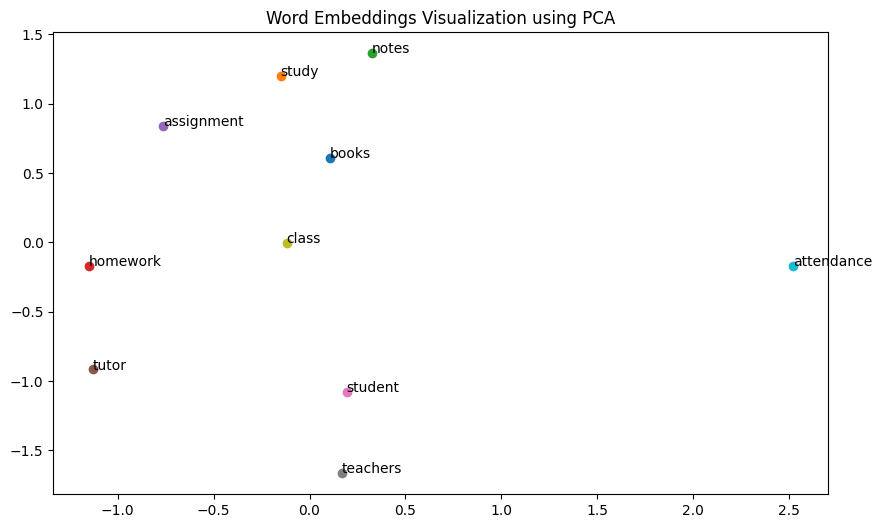

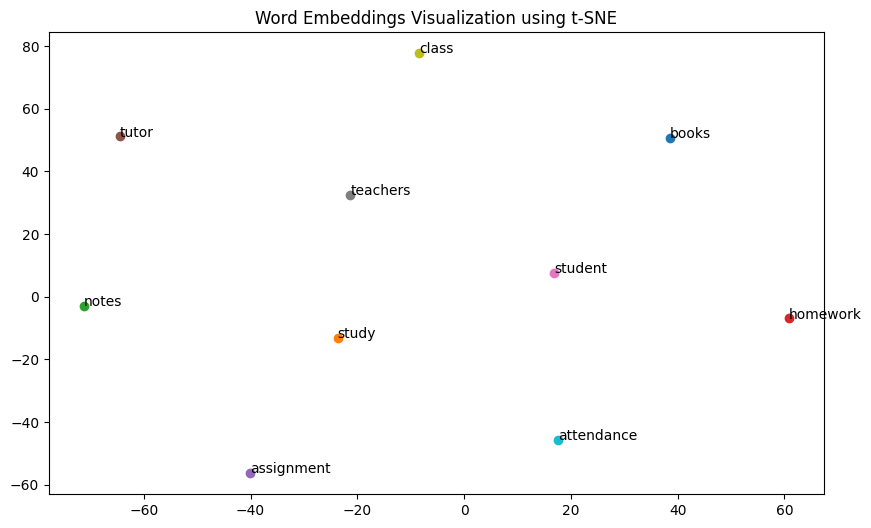

Top 5 words similar to 'education': [('eduction', 0.7980327010154724), ('eduation', 0.7175650000572205), ('LISA_MICHALS_covers', 0.6817380785942078), ('Matt_Krupnick_covers', 0.6798164248466492), ('educational', 0.6780008673667908)]


In [3]:
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

def load():
    print("Loading pre-trained word vectors...")
    model = api.load("word2vec-google-news-300")  # Loads Google's Word2Vec model
    print("Model loaded successfully!")
    return model

"""Word analogy tasks using vector arithmetic:

    Example: "king" + "woman" - "man" → should result in "queen"
    Example: "Paris" + "Italy" - "France" → should result in "Rome" or "Milan"

Uses model.most_similar(positive=[words], negative=[words]) to perform word vector algebra.
Handles missing words with a KeyError exception."""

def vector_arithmetic(model):
    print("\nExploring word relationships using vector arithmetic:")
    examples = [
        (["king", "woman"], ["man"]),
        (["Paris", "Italy"], ["France"]),
        (["walking", "run"], ["walk"])
    ]
    
    for pos, neg in examples:
        try:
            result = model.most_similar(positive=pos, negative=neg, topn=1)
            print(f"{pos} - {neg} = {result}")
        except KeyError as e:
            print(f"Word '{e.args[0]}' not found in vocabulary.")
            
"""Filters out words not found in the vocabulary.
Converts words to their vector representations.
Reduces 300-dimensional embeddings to 2D using:

    PCA (Principal Component Analysis) for linear dimensionality reduction.
    t-SNE (t-Distributed Stochastic Neighbor Embedding) for capturing complex relationships.

Plots word vectors using matplotlib."""

def visualize_embeddings(model, words, method='PCA'):
    valid_words = [word for word in words if word in model.key_to_index]  # Avoid missing words
    vectors = np.array([model[word] for word in valid_words])
    
    if method == 'PCA':
        reducer = PCA(n_components=2)
    else:
        reducer = TSNE(n_components=2, random_state=42, perplexity=min(30, len(valid_words)-1))  # Avoid small data issues
    
    reduced_vectors = reducer.fit_transform(vectors)

    plt.figure(figsize=(10, 6))
    for i, word in enumerate(valid_words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    
    plt.title(f"Word Embeddings Visualization using {method}")
    plt.show()

"""Finds the top N most similar words to a given word.
Uses model.most_similar(word, topn=topn).
If the word is not found, it returns a message instead of throwing an error."""

def find_similar_words(model, word, topn=5):
    if word in model.key_to_index:
        return model.most_similar(word, topn=topn)
    else:
        return f"Word '{word}' not in vocabulary"

def main():
    model = load()
    #vector_arithmetic(model)
    
    tech_words = ["books", "study", "notes", "homework", "assignment", "tutor", "student", "teachers", "class", "attendance"]
    visualize_embeddings(model, tech_words, method='PCA')
    visualize_embeddings(model, tech_words, method='t-SNE')
    
    word = "education"
    similar_words = find_similar_words(model, word)
    print(f"Top 5 words similar to '{word}':", similar_words)

if __name__ == "__main__":
    main()